# Objectif:

In this Project we will see  how to handle sound files in python, compute sound and audio features from them, and run machine learning algorithms on them.

# Import the Libraries needed

**pandas :** is a library written for the Python programming language allowing data manipulation and analysis. In particular, it provides data structures and operations for manipulating numerical arrays and time series.

**numpy :** is an extension of the Python programming language, designed to manipulate multidimensional matrices or arrays as well as mathematical functions operating on these arrays.

**matplotlib :** Matplotlib is a library of the Python programming language for plotting and visualizing data in graphical form. It can be combined with the NumPy and SciPy python libraries for scientific computation.

**Scipy :** is a project aiming to unify and federate a set of Python libraries for scientific use. Scipy uses the arrays and matrices of the NumPy module.

**Pickle :** is a python module that allows you to save one or more variables in a file and retrieve their values later. Variables can be of any type.

**librosa :** It is a Python module to analyze audio signals in general but geared more towards music. It includes the nuts and bolts to build a MIR(Music information retrieval) system.

**IPython.display :** lets you play audio directly in your notebook.

**Librosa :**  is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [3]:
audio_data = '../gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00096.wav'
data , sr = librosa.load(audio_data)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


This step :

```
data , sr = librosa.load(audio_data)
```

loads and decodes the audio as a time series y, represented as a one-dimensional NumPy floating point array. The variable sr contains the sampling rate of y, that is, the number of samples per second of audio. By default, all audio is mixed to mono and resampled to 22050 Hz at load time. This behavior can be overridden by supplying additional arguments to librosa.load().

Audio will be automatically resampled to the given rate (default sr=22050).

To preserve the native sampling rate of the file, use sr=None.

We can change this behavior by resampling at 45.6KHz.

In [4]:
librosa.load(audio_data, sr=45600)

(array([-0.08003321, -0.10589562, -0.09959807, ..., -0.06361606,
        -0.05566827, -0.02777512], dtype=float32),
 45600)

This returns an audio time series as a numpy array with a default sampling rate(sr)

# Playing Audio:

With the use of IPython.display.Audio we will play the audio in our notebook.

In [5]:
import IPython
IPython.display.Audio(data, rate=sr)

# Visualizing Audio :

**Plot Raw Wave File** : 

Plot Raw Wave plot is the amplitude envelope of a waveform

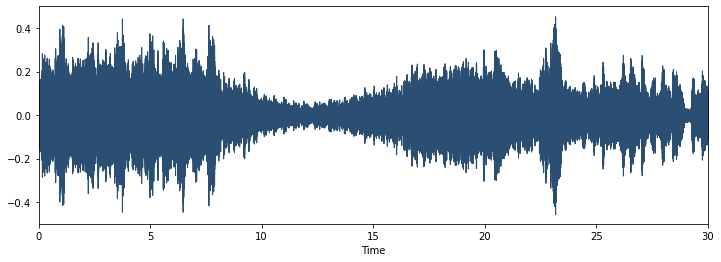

In [6]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, color = "#2B4F72")
plt.show()

**Plot Spectrogram**:

A spectrogram is a visual way of representing the signal loudness, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

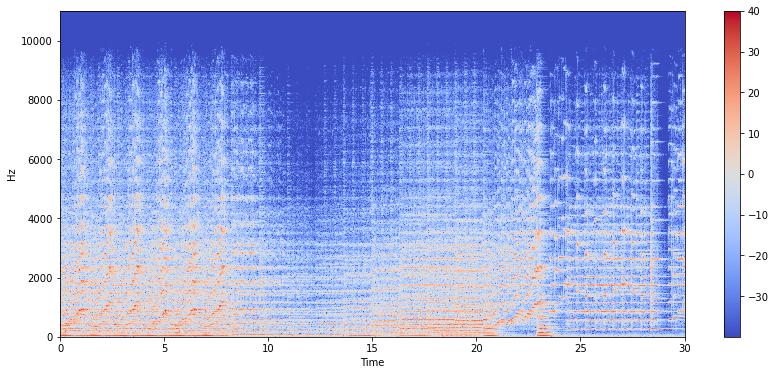

In [7]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

The vertical axis represents frequencies (from 0 to 10kHz), and the horizontal axis represents the time of the clip. 


Let's Convert the frequency axis to a logarithm , because we see that all actions (in red) is taking place at the bottom of the spectrum.

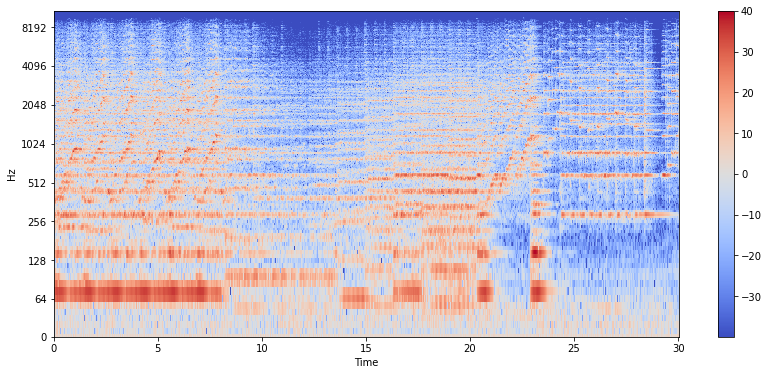

In [8]:
plt.figure(figsize=(14, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

[](http://)**Spectral Rolloff**


is the frequency below which a specified percentage of the total spectral energy

[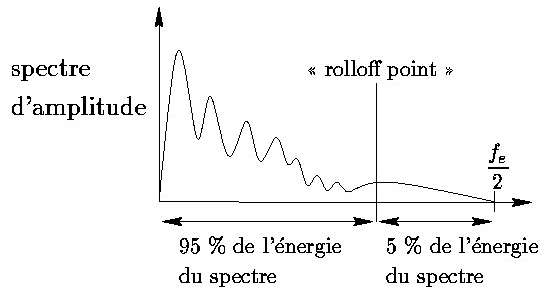](http://)

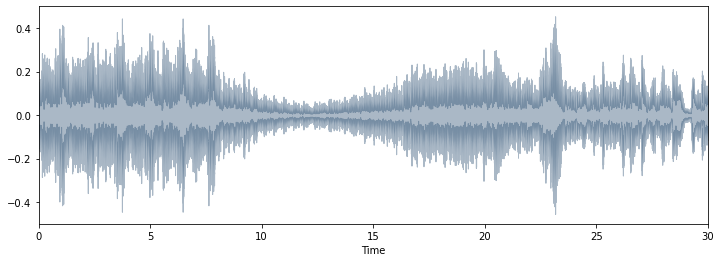

In [9]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sr, alpha=0.4, color = "#2B4F72")

**Zero-Crossing Rate**:

a zero crossing is said to occur if successive samples have different
algebraic signs. The rate at which zero crossings occur is a simple measure of the frequency content of a
signal. Zero-crossing rate is a measure of number of times in a given time interval/frame that the
amplitude of the speech signals passes through a value of zero

[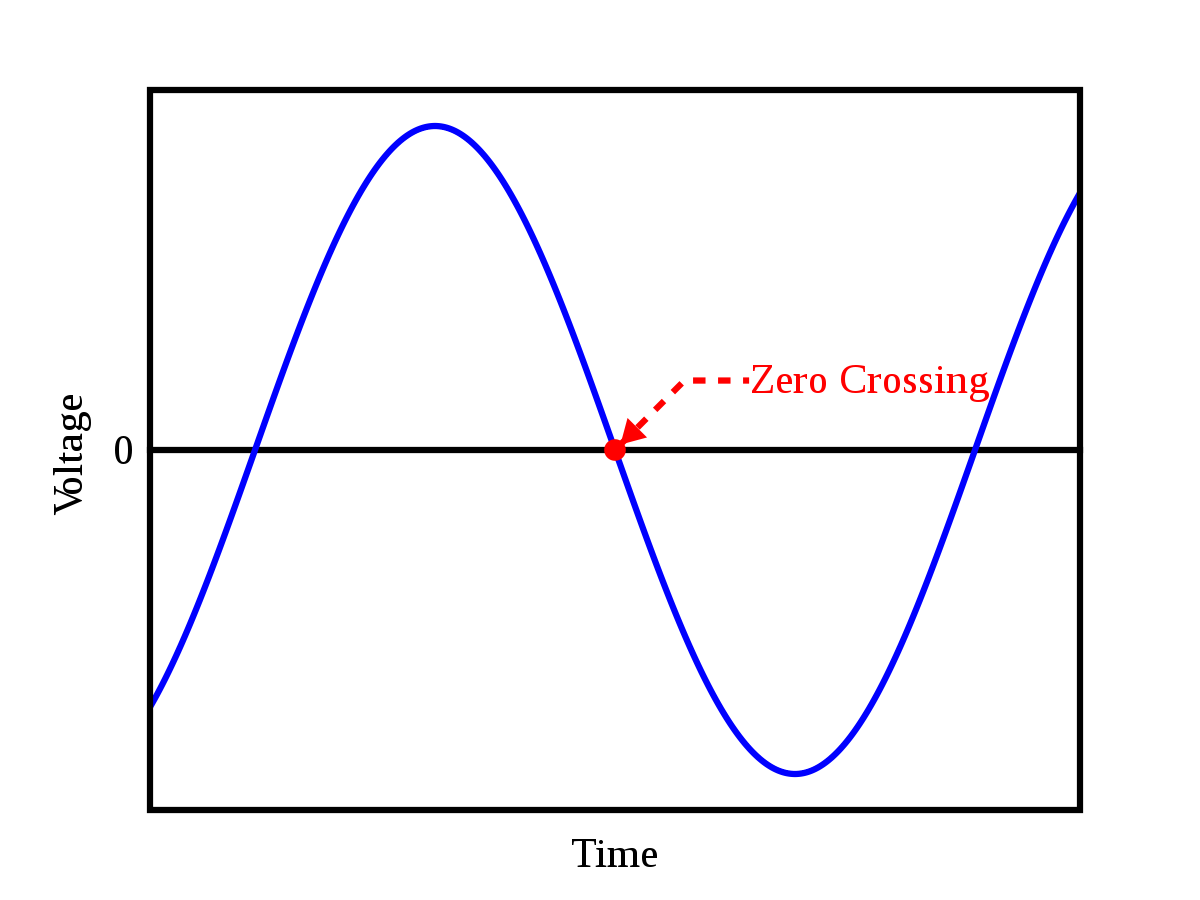](http://)

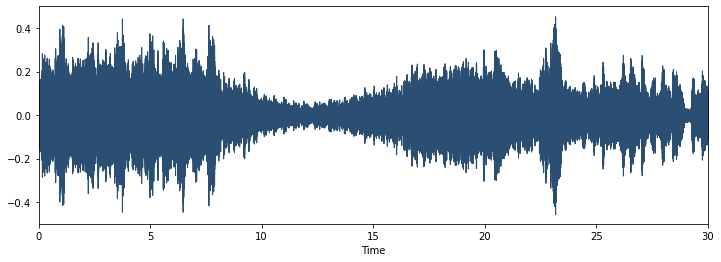

In [10]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sr, color="#2B4F72")

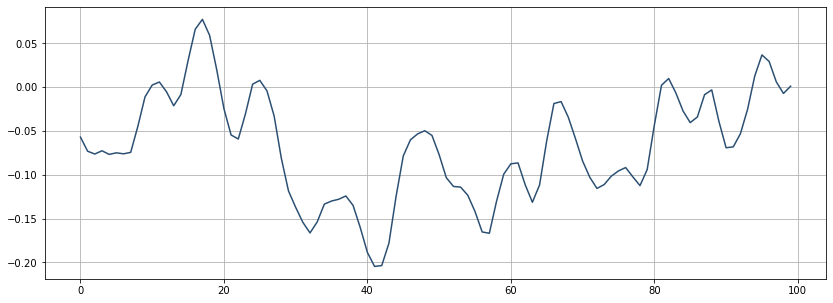

In [11]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(data[n0:n1], color="#2B4F72")
plt.grid()

The graph shows 11 zero crossings. Let’s verify it with Librosa.

In [12]:
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print("The number of zero-crossings is :",sum(zero_crossings))

The number of zero-crossings is : 11


**Chroma feature**

is a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation.

The link of the image: [https://wikivisually.com/wiki/Chroma_feature](http://)

[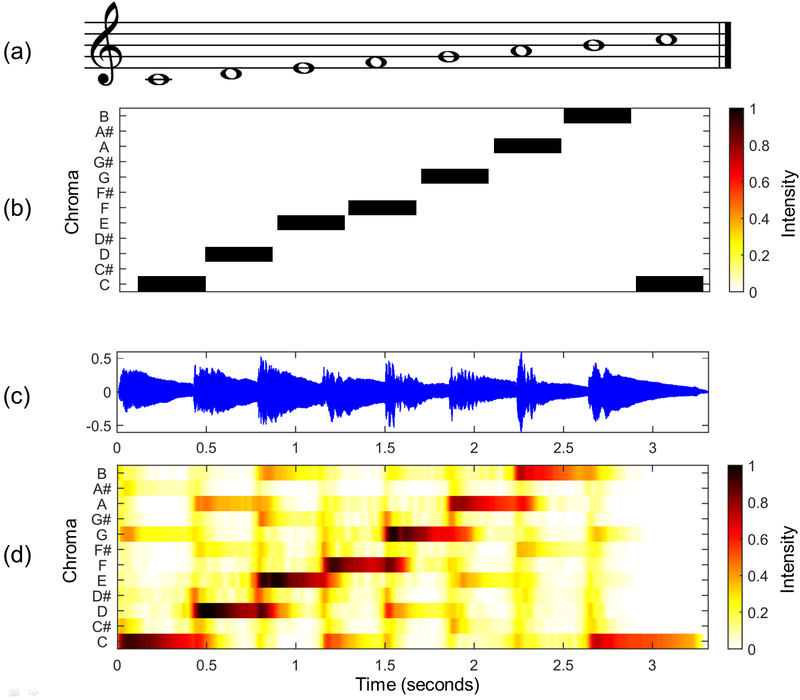](http://)

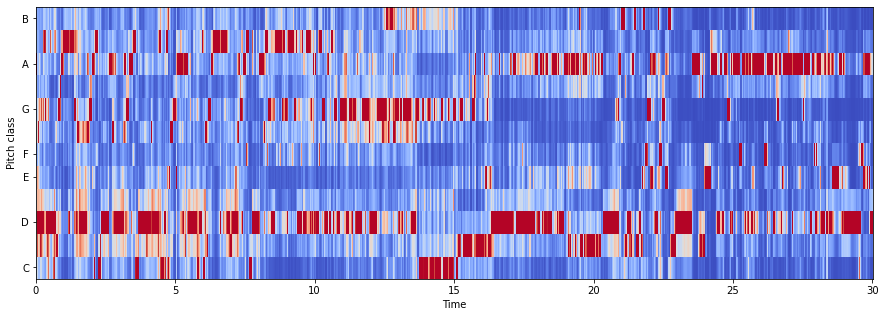

In [13]:
chromagram = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

# Training Our Model

**Classification**

Our Datasets contains 10 genres :
*   Blues
*   Classical
*   Country
*   Disco
*   Hiphop
*   Jazz
*   Metal
*   Pop
*   Reggae
*   Rock

In [14]:
%matplotlib inline
from keras import layers
import keras

In [15]:
df1 = pd.read_csv('../input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv')
df1.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [16]:
df1.shape

(9990, 60)

In [17]:
df1.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

We will drop the first column of "filename":

In [18]:
df1 = df1.drop(labels='filename',axis=1)

**Preprocessing the Data**

We will now focus on the last column "label" the categorical column and we will try to encode it with the function LabelEncoder() of sklearn.preprocessing.

In [19]:
genre_list = df1.iloc[:, -1]
encoder = LabelEncoder()

In [20]:
y = encoder.fit_transform(genre_list)

In [21]:
print(y)

[0 0 0 ... 9 9 9]


In [22]:
print(df1.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df1.iloc[:, :-1], dtype = float))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [25]:
from keras.models import Sequential

In [26]:
# Neural network
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
53/53 [==============================] - 0s 2ms/step - loss: 1.4772 - accuracy: 0.4830
Epoch 2/100
53/53 [==============================] - 0s 2ms/step - loss: 0.8920 - accuracy: 0.6922
Epoch 3/100
53/53 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.7662
Epoch 4/100
53/53 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.8107
Epoch 5/100
53/53 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.8342
Epoch 6/100
53/53 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8612
Epoch 7/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8854
Epoch 8/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.9012
Epoch 9/100
53/53 [==============================] - 0s 2ms/step - loss: 0.2763 - accuracy: 0.9162
Epoch 10/100
53/53 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.9275
Epoch 11/

53/53 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9984
Epoch 84/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9990
Epoch 85/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 86/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.9987
Epoch 87/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9990
Epoch 88/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 89/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9993
Epoch 90/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9990
Epoch 91/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9991
Epoch 92/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9988
Epoch 93/100


In [28]:
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=128)

26/26 [==============================] - 0s 1ms/step - loss: 0.6041 - accuracy: 0.8908


In [29]:
print("The test loss is :",test_loss, "\nThe test accuracy is :",test_acc)

The test loss is : 0.604056715965271 
The test accuracy is : 0.8908098340034485
